# Setup

In [38]:
using Statistics, LinearAlgebra, CSV, DataFramesMeta
using FFTW
using Plots
plotlyjs()
using Printf
using RemoteREPL
@async serve_repl()

Task (failed) @0x00000135b64b1370
IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
  [1] uv_error
    @ .\libuv.jl:100 [inlined]
  [2] #listen#13
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:628 [inlined]
  [3] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:627 [inlined]
  [4] #listen#10
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:621 [inlined]
  [5] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:618 [inlined]
  [6] #listen#12
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [7] listen
    @ C:\Users\torfi\.julia\juliaup\julia-1.9.3+0.x64.w64.mingw32\share\julia\stdlib\v1.9\Sockets\src\Sockets.jl:625 [inlined]
  [

# Get Data

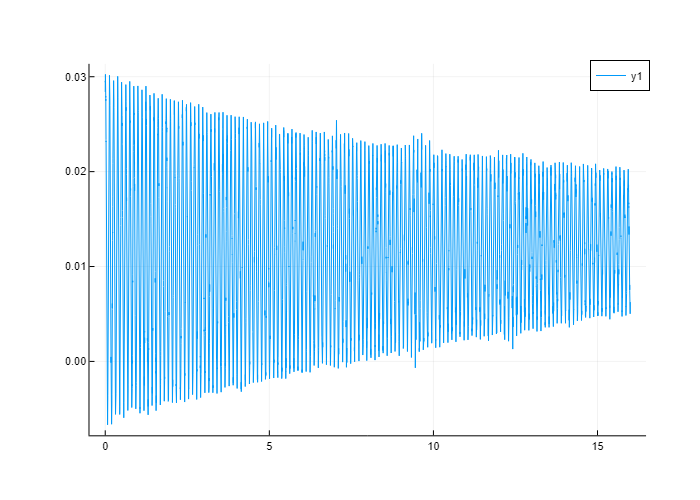

In [39]:
using CSV, Plots
data = CSV.read("Group_13.csv", DataFrame)
β_1 = 0.1
α_1 = inv(β_1)
data[:,2] = data[:,2]*α_1
plot(data[:,1], data[:,2])

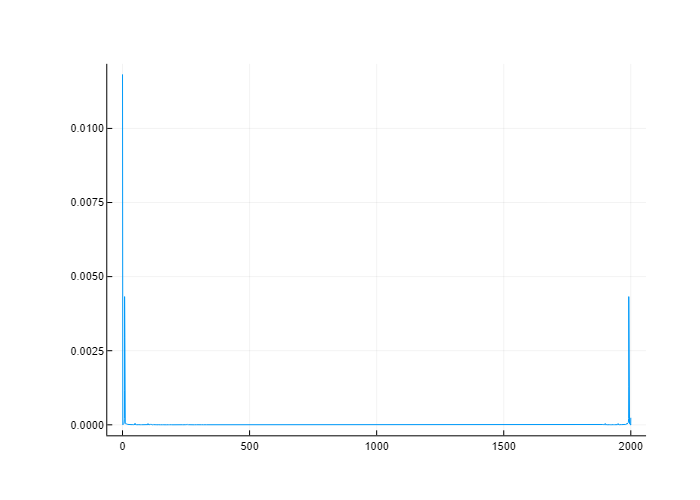

In [48]:
T_s = maximum(data[:,1]) - minimum(data[:,1])
N = size(data)[1]
c_k = 1/N*fft(data[:,2])
k = 0:N-1
ω_k0 = 2π/T_s
ω_k = k .* ω_k0
plot(ω_k ./2π, c_k .|> abs, legend=:none)

In [52]:
ω_n_hat = ω_k[findmax(abs.(c_k[2:end]),)[2]]/2π

8.062751960998781